# Datasets for EAD (Exploratory Data Analysis)

Importing needed libraries and setting configurations:

In [3]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt

## Gas Prices in Brazil 2004-2019 Dataset

Source and further information:

https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil

Data:

In [24]:
df_gasPricesBR = pd.read_csv('data_gasPricesBR_2004-2019.tsv', sep = '\t', index_col = 0 )

In [25]:
df_gasPricesBR.head(5)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


## Tratamento da Base

In [26]:
df_gasPricesBR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
DATA INICIAL                     106823 non-null object
DATA FINAL                       106823 non-null object
REGIÃO                           106823 non-null object
ESTADO                           106823 non-null object
PRODUTO                          106823 non-null object
NÚMERO DE POSTOS PESQUISADOS     106823 non-null int64
UNIDADE DE MEDIDA                106823 non-null object
PREÇO MÉDIO REVENDA              106823 non-null float64
DESVIO PADRÃO REVENDA            106823 non-null float64
PREÇO MÍNIMO REVENDA             106823 non-null float64
PREÇO MÁXIMO REVENDA             106823 non-null float64
MARGEM MÉDIA REVENDA             106823 non-null object
COEF DE VARIAÇÃO REVENDA         106823 non-null float64
PREÇO MÉDIO DISTRIBUIÇÃO         106823 non-null object
DESVIO PADRÃO DISTRIBUIÇÃO       106823 non-null object
PREÇO MÍNIMO DISTRIBUIÇÃO        106823 non-n

### Renomear Colunas

In [27]:
df_gasPricesBR.rename(
    columns={
        "DATA INICIAL": "data_ini",
        "DATA FINAL": "data_fim",
        "REGIÃO": "regiao",
        "ESTADO": "estado",
        "PRODUTO": "produto",
        "NÚMERO DE POSTOS PESQUISADOS": "n_postos",
        "UNIDADE DE MEDIDA": "unidade_medida",
        "PREÇO MÉDIO REVENDA": "preco_medio_revenda",
        "DESVIO PADRÃO REVENDA": "desvpad_revenda",
        "PREÇO MÍNIMO REVENDA": "min_preco_revenda",
        "PREÇO MÁXIMO REVENDA": "max_preco_revenda",
        "MARGEM MÉDIA REVENDA": "margem_media_revenda",
        "ANO": "ano",
        "MÊS": "mes",
        "COEF DE VARIAÇÃO DISTRIBUIÇÃO": "coef_dist",
        "PREÇO MÁXIMO DISTRIBUIÇÃO": "max_preco_dist",
        "PREÇO MÍNIMO DISTRIBUIÇÃO": "min_preco_dist",
        "DESVIO PADRÃO DISTRIBUIÇÃO": "desvpad_dist",
        "PREÇO MÉDIO DISTRIBUIÇÃO": "preco_medio_dist",
        "COEF DE VARIAÇÃO REVENDA": "coef_revenda"
    },
    inplace=True
)


### Typecast

In [37]:
df_gasPricesBR['data_ini']=pd.to_datetime(df_gasPricesBR['data_ini'], format="%Y/%m/%d")
df_gasPricesBR['data_fim']=pd.to_datetime(df_gasPricesBR['data_fim'], format="%Y/%m/%d")

for col in ['margem_media_revenda', 'preco_medio_dist', 'desvpad_dist', 'min_preco_dist', 'max_preco_dist', 'coef_dist']:
    df_gasPricesBR[col] = pd.to_numeric(df_gasPricesBR[col], errors='coerce')
    
df_gasPricesBR.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
data_ini                106823 non-null datetime64[ns]
data_fim                106823 non-null datetime64[ns]
regiao                  106823 non-null object
estado                  106823 non-null object
produto                 106823 non-null object
n_postos                106823 non-null int64
unidade_medida          106823 non-null object
preco_medio_revenda     106823 non-null float64
desvpad_revenda         106823 non-null float64
min_preco_revenda       106823 non-null float64
max_preco_revenda       106823 non-null float64
margem_media_revenda    103392 non-null float64
coef_revenda            106823 non-null float64
preco_medio_dist        103423 non-null float64
desvpad_dist            103423 non-null float64
min_preco_dist          103423 non-null float64
max_preco_dist          103423 non-null float64
coef_dist               103423 non-null float64
mes              

#### Checa por Valores Nulos

In [38]:
df_gasPricesBR.isnull().sum()

data_ini                   0
data_fim                   0
regiao                     0
estado                     0
produto                    0
n_postos                   0
unidade_medida             0
preco_medio_revenda        0
desvpad_revenda            0
min_preco_revenda          0
max_preco_revenda          0
margem_media_revenda    3431
coef_revenda               0
preco_medio_dist        3400
desvpad_dist            3400
min_preco_dist          3400
max_preco_dist          3400
coef_dist               3400
mes                        0
ano                        0
dtype: int64

### Formatar Valores

In [41]:
regioes = {"SUL":"Sul", "SUDESTE":"Sudeste", "CENTRO OESTE":"Centro Oeste", 
            "NORTE":"Norte", "NORDESTE":"Nordeste"}

df_gasPricesBR["regiao"] = df_gasPricesBR.regiao.map(regioes)

df_gasPricesBR.regiao.value_counts()

Nordeste        36869
Norte           24702
Sudeste         17047
Centro Oeste    15429
Sul             12776
Name: regiao, dtype: int64

In [45]:
produtos = {"ÓLEO DIESEL":"Diesel", "GASOLINA COMUM":"Gasolina", "GLP":"GLP", 
            "ETANOL HIDRATADO":"Etanol", "GNV":"Gás Natural", "ÓLEO DIESEL S10":"Diesel S10"}

df_gasPricesBR["produto"] = df_gasPricesBR.produto.map(produtos)

df_gasPricesBR.produto.value_counts()

Diesel         21194
Gasolina       21194
GLP            21186
Etanol         21102
Gás Natural    13034
Diesel S10      9113
Name: produto, dtype: int64

In [ ]:
df_gasPricesBR.describe()

## Análise Exploratória de Dados

### Contagem por região

Nordeste        36869
Norte           24702
Sudeste         17047
Centro Oeste    15429
Sul             12776
Name: regiao, dtype: int64


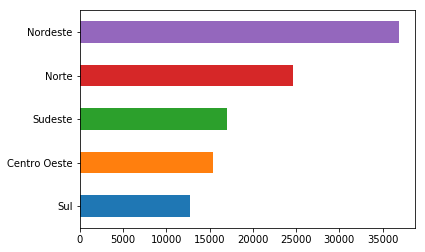

In [104]:
contagem_regiao = df_gasPricesBR.regiao.value_counts()
print(contagem_regiao)
contagem_regiao.sort_values().plot(kind='barh')
plt.show()

### Contagem por Região por Combustível

regiao       Centro Oeste  Nordeste  Norte  Sudeste   Sul
produto                                                  
Diesel               3140      7065   5494     3140  2355
Diesel S10           1349      3039   2359     1352  1014
Etanol               3140      7064   5404     3140  2354
GLP                  3137      7061   5494     3139  2355
Gasolina             3140      7065   5494     3140  2355
Gás Natural          1523      5575    457     3136  2343


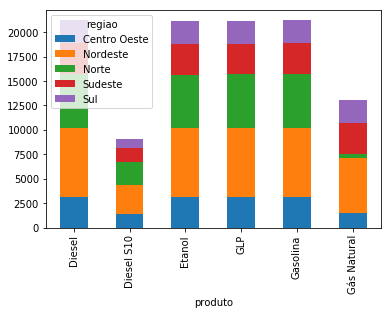

In [98]:
contagem_regiao_produto = df_gasPricesBR.groupby(['produto', 'regiao'])['preco_medio_revenda'].count()
print(contagem_regiao_produto.unstack())
contagem_regiao_produto.unstack().plot(kind='bar', stacked=True)
plt.show()

In [ ]:
### Contagem por Estado

RIO GRANDE DO SUL      4263
SAO PAULO              4263
CEARA                  4263
RIO DE JANEIRO         4263
BAHIA                  4263
PARAIBA                4263
RIO GRANDE DO NORTE    4262
PERNAMBUCO             4262
SANTA CATARINA         4262
MINAS GERAIS           4261
ESPIRITO SANTO         4260
SERGIPE                4259
PARANA                 4251
ALAGOAS                4250
MATO GROSSO DO SUL     4246
MATO GROSSO            4037
AMAZONAS               3889
GOIAS                  3663
PIAUI                  3548
MARANHAO               3499
PARA                   3497
TOCANTINS              3483
DISTRITO FEDERAL       3483
ACRE                   3480
RONDONIA               3479
RORAIMA                3471
AMAPA                  3403
Name: estado, dtype: int64


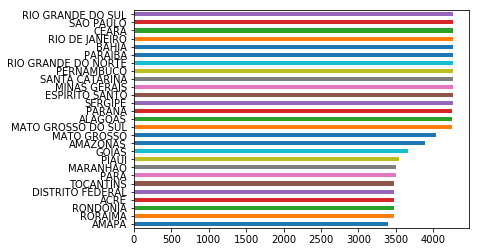

In [105]:
contagem_estado = df_gasPricesBR.estado.value_counts()
print(contagem_estado)
contagem_estado.sort_values().plot(kind='barh')
plt.show()

### Contagem por Estado por Produto

produto              Diesel  Diesel S10  Etanol    GLP  Gasolina  Gás Natural
estado                                                                       
ACRE                  785.0       336.0   784.0  785.0     785.0          5.0
ALAGOAS               785.0       337.0   785.0  784.0     785.0        774.0
AMAPA                 784.0       336.0   703.0  784.0     784.0         12.0
AMAZONAS              785.0       337.0   785.0  785.0     785.0        412.0
BAHIA                 785.0       338.0   785.0  785.0     785.0        785.0
CEARA                 785.0       338.0   785.0  785.0     785.0        785.0
DISTRITO FEDERAL      785.0       336.0   785.0  783.0     785.0          9.0
ESPIRITO SANTO        785.0       338.0   785.0  784.0     785.0        783.0
GOIAS                 785.0       338.0   785.0  784.0     785.0        186.0
MARANHAO              785.0       338.0   785.0  784.0     785.0         22.0
MATO GROSSO           785.0       337.0   785.0  785.0     785.0

<Figure size 50000x50000 with 0 Axes>

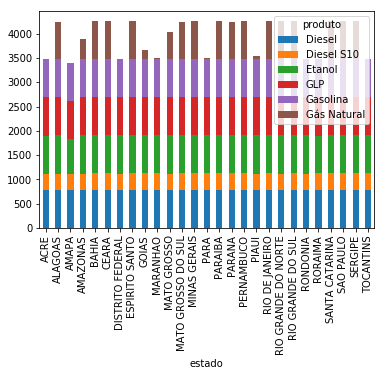

In [112]:
plt.figure(
    figsize=(500, 500),
    dpi=100)
contagem_estado_produto = df_gasPricesBR.groupby(['estado', 'produto'])['preco_medio_revenda'].count()
print(contagem_estado_produto.unstack())
contagem_estado_produto.unstack().plot(kind='bar', stacked=True)
plt.show()

In [67]:
### Média de Preço por Ano e Região

In [70]:
df_gasPricesBR.groupby(['ano', 'regiao', 'produto'])['preco_medio_revenda'].mean()

ano   regiao        produto    
2004  Centro Oeste  Diesel          1.632838
                    Etanol          1.502309
                    GLP            33.797787
                    Gasolina        2.288507
                    Gás Natural     1.133059
      Nordeste      Diesel          1.480964
                    Etanol          1.534441
                    GLP            32.072791
                    Gasolina        2.186523
                    Gás Natural     1.148996
      Norte         Diesel          1.672861
                    Etanol          1.736340
                    GLP            33.810786
                    Gasolina        2.351059
      Sudeste       Diesel          1.499279
                    Etanol          1.274912
                    GLP            29.259257
                    Gasolina        2.126941
                    Gás Natural     1.108868
      Sul           Diesel          1.543127
                    Etanol          1.396853
                    GLP

In [15]:
df_gasPricesBR[df_gasPricesBR['ANO'] == 2019].groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].mean()

ESTADO
ACRE                   19.539656
ALAGOAS                14.015613
AMAPA                  21.057955
AMAZONAS               16.324963
BAHIA                  13.514953
CEARA                  15.542520
DISTRITO FEDERAL       17.237209
ESPIRITO SANTO         13.804187
GOIAS                  17.339524
MARANHAO               16.879866
MATO GROSSO            22.248127
MATO GROSSO DO SUL     14.954376
MINAS GERAIS           14.755193
PARA                   18.537768
PARAIBA                14.337493
PARANA                 14.593872
PERNAMBUCO             13.967107
PIAUI                  16.689648
RIO DE JANEIRO         13.957967
RIO GRANDE DO NORTE    14.582667
RIO GRANDE DO SUL      14.728027
RONDONIA               18.924864
RORAIMA                19.859496
SANTA CATARINA         14.576433
SAO PAULO              13.985307
SERGIPE                14.815313
TOCANTINS              18.734764
Name: PREÇO MÉDIO REVENDA, dtype: float64